# Project Results and Final Analysis

### Executive Summary
This project aimed to accurately classify ECG heartbeats from the MIT-BIH Arrhythmia Database, a task complicated by a significant class imbalance. Three models were evaluated, with the **Macro Average F1-Score** serving as the key metric to ensure fair performance across both common and rare arrhythmia classes. The results clearly demonstrate that addressing the data imbalance with SMOTE was the most critical step for achieving a high-performance, clinically useful model.

---

### Overall Model Comparison

The performance of the three models is summarized in the chart below. The **SMOTE + 1D CNN** model was the clear winner, achieving a Macro Average F1-Score of **0.95**. This is a significant improvement over the baseline model's score of 0.76 and the more complex hybrid model's score of 0.82.

![Overall Model Performance Comparison](model_comparison_macro_f1_v2.png)

---

### Performance on Rare Arrhythmia Classes

A key goal was to improve the model's ability to detect rare but critical arrhythmia classes. The chart below shows the F1-Scores for classes 'F', 'j', and 'J'. The baseline CNN completely failed on 'F' and 'j', while the SMOTE-trained models successfully learned to identify them.

![Model Performance on Rare Arrhythmia Classes](model_comparison_rare_classes_v2.png)

---

### Detailed Classification Reports

Below are the full classification reports for each of the three experiments.

#### 1. Baseline 1D CNN (Imbalanced Data)
* **Conclusion**: Misleadingly high 99% accuracy, but a low **Macro Avg F1-Score of 0.76**. Failed completely on rare classes 'F' and 'j'.

| Class | Precision | Recall | F1-Score | Support |
|:---:|:---:|:---:|:---:|:---:|
| **N** | 0.99 | 1.00 | 1.00 | 2527 |
| **V** | 0.98 | 0.95 | 0.97 | 152  |
| **A** | 0.97 | 0.91 | 0.94 | 104  |
| **L** | 1.00 | 1.00 | 1.00 | 308  |
| **R** | 1.00 | 0.99 | 0.99 | 201  |
| **F** | 0.00 | 0.00 | 0.00 | 4    |
| **j** | 0.00 | 0.00 | 0.00 | 1    |
| **a** | 1.00 | 1.00 | 1.00 | 1    |
| **J** | 0.86 | 1.00 | 0.92 | 6    |

<pre>
    accuracy                           0.99      3304
   macro avg       0.76      0.76      0.76      3304
weighted avg       0.99      0.99      0.99      3304
</pre>

#### 2. SMOTE + 1D CNN (Best Performing Model)
* **Conclusion**: **Excellent performance**. The **Macro Avg F1-Score jumped to 0.95**, and the model now reliably identifies all arrhythmia classes.

| Class | Precision | Recall | F1-Score | Support |
|:---:|:---:|:---:|:---:|:---:|
| **N** | 1.00 | 1.00 | 1.00 | 2527 |
| **V** | 0.97 | 0.96 | 0.97 | 152  |
| **A** | 0.94 | 0.97 | 0.96 | 104  |
| **L** | 1.00 | 1.00 | 1.00 | 308  |
| **R** | 1.00 | 1.00 | 1.00 | 201  |
| **F** | 0.50 | 0.75 | 0.60 | 4    |
| **j** | 1.00 | 1.00 | 1.00 | 1    |
| **a** | 1.00 | 1.00 | 1.00 | 1    |
| **J** | 1.00 | 1.00 | 1.00 | 6    |

<pre>
    accuracy                           0.99      3304
   macro avg       0.93      0.96      0.95      3304
weighted avg       0.99      0.99      0.99      3304
</pre>

#### 3. SMOTE + Hybrid CNN-LSTM
* **Conclusion**: A lower **Macro Avg F1-Score of 0.82**. The model showed signs of overfitting, with perfect recall but very low precision on some rare classes, making it unreliable.

| Class | Precision | Recall | F1-Score | Support |
|:---:|:---:|:---:|:---:|:---:|
| **N** | 1.00 | 0.98 | 0.99 | 2527 |
| **V** | 0.93 | 0.97 | 0.95 | 152  |
| **A** | 0.90 | 0.95 | 0.93 | 104  |
| **L** | 0.99 | 1.00 | 1.00 | 308  |
| **R** | 0.94 | 0.99 | 0.96 | 201  |
| **F** | 0.67 | 1.00 | 0.80 | 4    |
| **j** | 0.09 | 1.00 | 0.17 | 1    |
| **a** | 0.50 | 1.00 | 0.67 | 1    |
| **J** | 0.86 | 1.00 | 0.92 | 6    |

<pre>
    accuracy                           0.98      3304
   macro avg       0.76      0.99      0.82      3304
weighted avg       0.99      0.98      0.98      3304
</pre>

---

### Final Conclusion

The results unequivocally show that for this classification task, **a well-prepared dataset is more critical than a complex model architecture**. The **SMOTE + 1D CNN** model is the best solution, providing an excellent balance of fairness and accuracy. This project underscores the importance of using appropriate metrics like the Macro Average F1-Score for evaluating models on imbalanced datasets.

Saved 'model_comparison_macro_f1_v2.png'


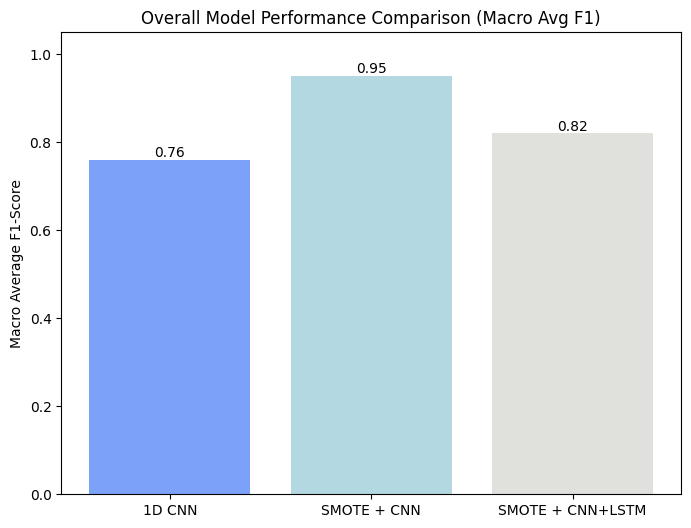

Saved 'model_comparison_rare_classes_v2.png'


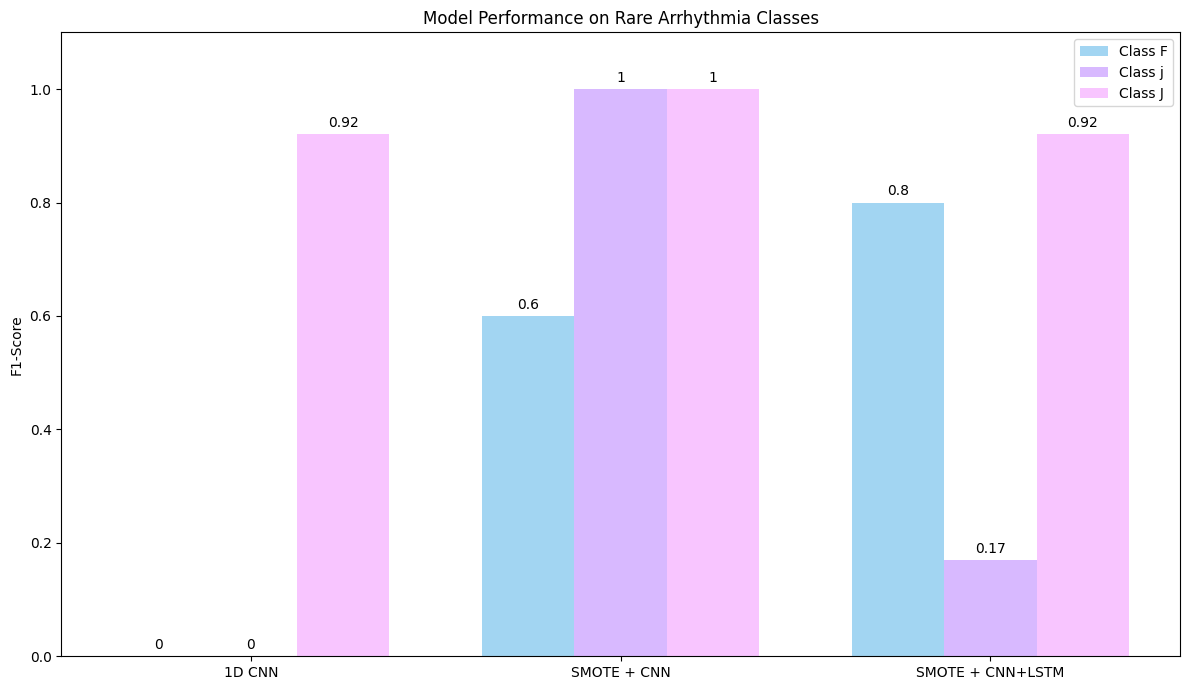

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# ===================================================================
# 1. Data from Your Classification Reports
# ===================================================================
models = ['1D CNN', 'SMOTE + CNN', 'SMOTE + CNN+LSTM']

# --- Overall Performance Metric ---
macro_f_scores = [0.76, 0.95, 0.82]

# --- Performance on Specific Rare Classes ---
rare_class_f_scores = {
    'F': [0.00, 0.60, 0.80],
    'j': [0.00, 1.00, 0.17],
    'J': [0.92, 1.00, 0.92]
}

# --- CORRECTED Color Palette ---
colors_main = ['#7ba2f8', '#b3d8e1', '#e0e1dd']
colors_rare = ['#a2d5f2', '#d8b9ff', '#f8c5ff']

# ===================================================================
# 2. Plot 1: Macro Average F1-Score Comparison
# ===================================================================
plt.figure(figsize=(8, 6))
bars = plt.bar(models, macro_f_scores, color=colors_main)

plt.ylabel('Macro Average F1-Score')
plt.title('Overall Model Performance Comparison (Macro Avg F1)')
plt.ylim(0, 1.05)

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.savefig('model_comparison_macro_f1_v2.png')
print("Saved 'model_comparison_macro_f1_v2.png'")
plt.show()


# ===================================================================
# 3. Plot 2: Grouped Bar Chart for Rare Class F1-Scores
# ===================================================================
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width, rare_class_f_scores['F'], width, label='Class F', color=colors_rare[0])
rects2 = ax.bar(x, rare_class_f_scores['j'], width, label='Class j', color=colors_rare[1])
rects3 = ax.bar(x + width, rare_class_f_scores['J'], width, label='Class J', color=colors_rare[2])

# Add some text for labels, title and axes ticks
ax.set_ylabel('F1-Score')
ax.set_title('Model Performance on Rare Arrhythmia Classes')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1.1)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.savefig('model_comparison_rare_classes_v2.png')
print("Saved 'model_comparison_rare_classes_v2.png'")
plt.show()